LSTM Stock Prediction

2025-09-08 09:59:07.376199: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-08 09:59:07.528012: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-08 09:59:10.408899: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
/tmp/ipykernel_3443/1200198926.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2015-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed
2025-09-08 09:59:13.236025: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Fa

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - loss: 0.0065 - val_loss: 0.0016
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 0.0020 - val_loss: 0.0039
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 355ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ -8s -140165us/step - loss: 0.0016 - val_loss: 0.0049
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 0.0016 - val_loss: 0.0050
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 12/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s -14

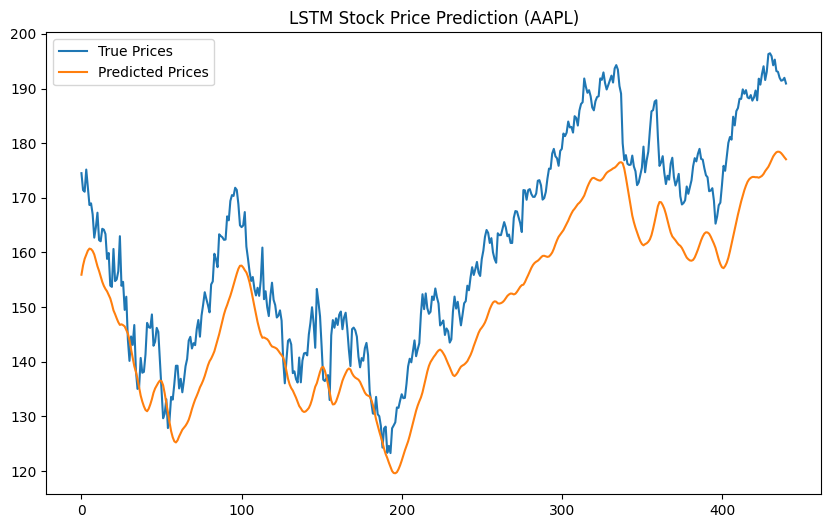

In [2]:

# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 2. Load real stock data
df = yf.download("AAPL", start="2015-01-01", end="2023-12-31")
data = df[["Close"]]

# 3. Preprocess
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

SEQ_LEN = 60
def create_sequences(data, seq_len=SEQ_LEN):
    X, y = [], []
    for i in range(len(data)-seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train/test split
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 4. Build model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LEN, 1)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# 5. Predictions
preds = model.predict(X_test)
preds_rescaled = scaler.inverse_transform(preds)
y_test_rescaled = scaler.inverse_transform(y_test)

# 6. Plot results
plt.figure(figsize=(10,6))
plt.plot(y_test_rescaled, label="True Prices")
plt.plot(preds_rescaled, label="Predicted Prices")
plt.legend()
plt.title("LSTM Stock Price Prediction (AAPL)")
plt.show()
